# **Solubility of Molecule**

# **Loading the Dataset**

## Load the dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# 1. Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv")
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Display Basic Info

In [ ]:
# Display basic info
print("Dataset Info:")
print(df.info())

print("\nFirst 5 Rows of the Dataset:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB
None

First 5 Rows of the Dataset:
   MolLogP    MolWt  NumRotatableBonds  AromaticProportion  logS
0   2.5954  167.850                0.0                 0.0 -2.18
1   2.3765  133.405                0.0                 0.0 -2.00
2   2.5938  167.850                1.0                 0.0 -1.74
3   2.0289  133.405                1.0                 0.0 -1.48
4   2.9189  187.375                1.0                 0.0 -3.04


# **Exploratory data Analysis (EDA)**

## Checking for Missing Values

In [ ]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
MolLogP               0
MolWt                 0
NumRotatableBonds     0
AromaticProportion    0
logS                  0
dtype: int64


## Summary Statistics

In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
           MolLogP        MolWt  NumRotatableBonds  AromaticProportion  \
count  1144.000000  1144.000000        1144.000000         1144.000000   
mean      2.449133   204.631675           2.173951            0.364932   
std       1.866003   102.620500           2.627398            0.343305   
min      -7.571400    16.043000           0.000000            0.000000   
25%       1.414900   122.126000           0.000000            0.000000   
50%       2.340300   183.594500           1.000000            0.375000   
75%       3.406475   270.715750           3.000000            0.666667   
max      10.388600   780.949000          23.000000            1.000000   

              logS  
count  1144.000000  
mean     -3.057997  
std       2.096502  
min     -11.600000  
25%      -4.332250  
50%      -2.870500  
75%      -1.600000  
max       1.580000  


## Correlation Heat Map

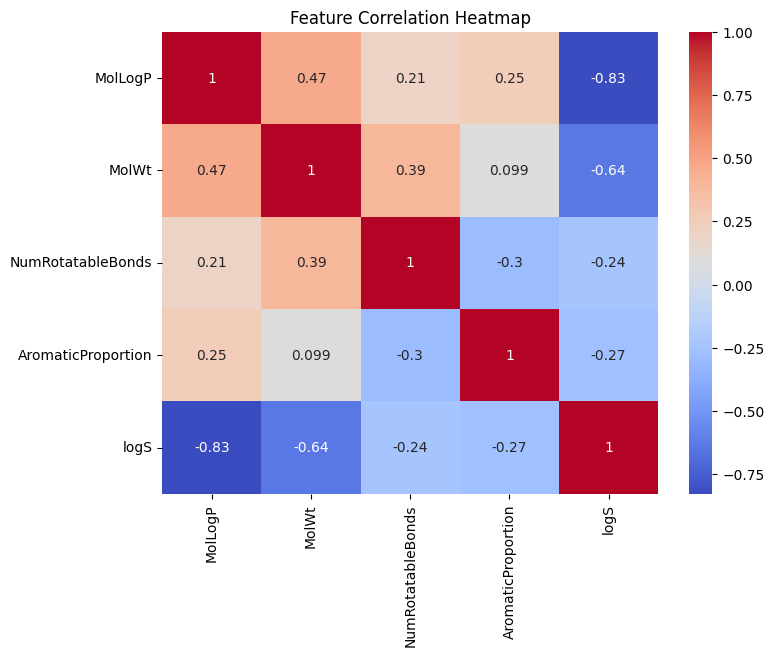

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## Checking for Outliers using Bloxplot

Boxplots Before Outlier Handling:


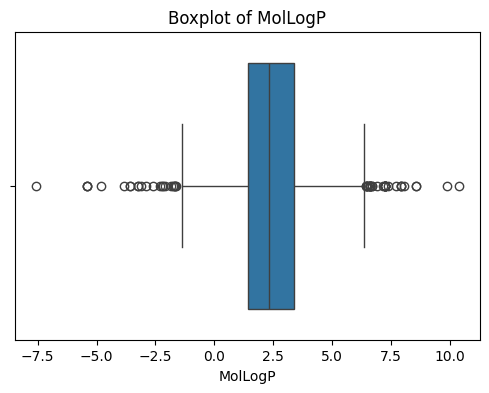

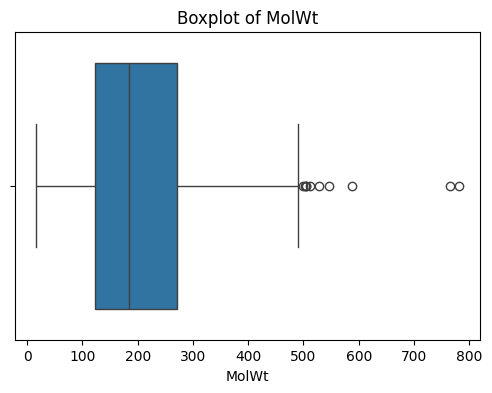

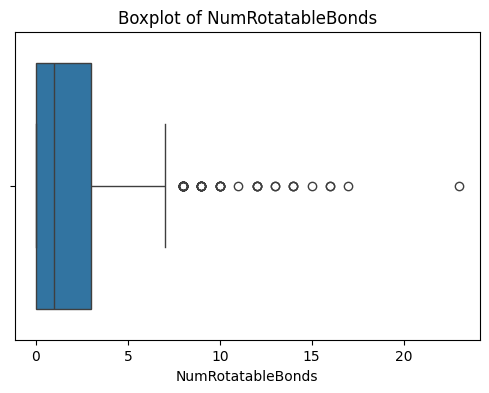

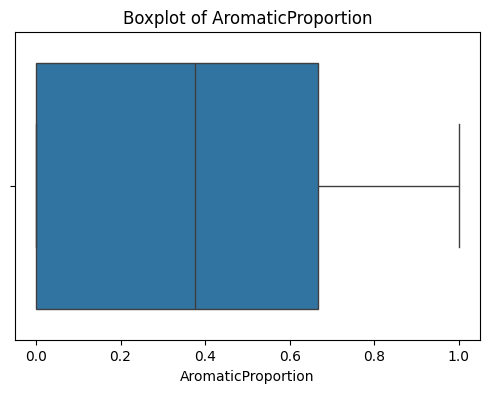

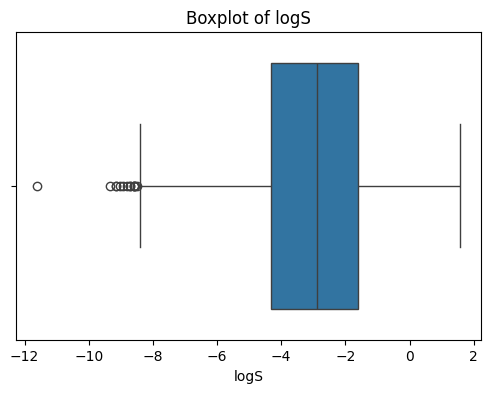

In [ ]:
# Visualize outliers using boxplots
print("Boxplots Before Outlier Handling:")
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

## Handling Outliers using IQR method

In [ ]:
# Handle outliers using IQR (Interquartile Range) method
outlier_columns = ['NumRotatableBonds', 'MolWt', 'MolLogP', 'AromaticProportion', 'logS']  # Columns with outliers
for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.0 * IQR
    upper_bound = Q3 + 1.0 * IQR

    # Remove outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

## Box plots after handling Outliers

Boxplots After Outlier Handling:


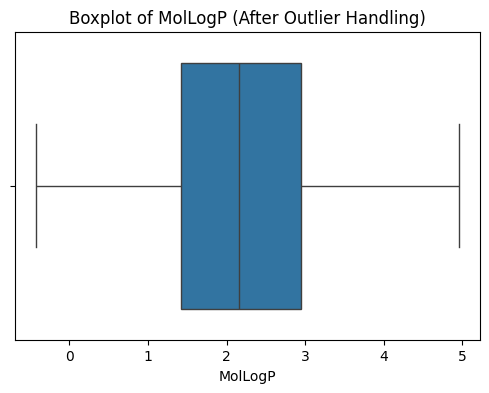

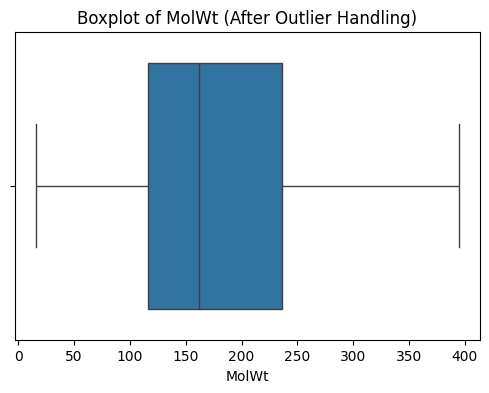

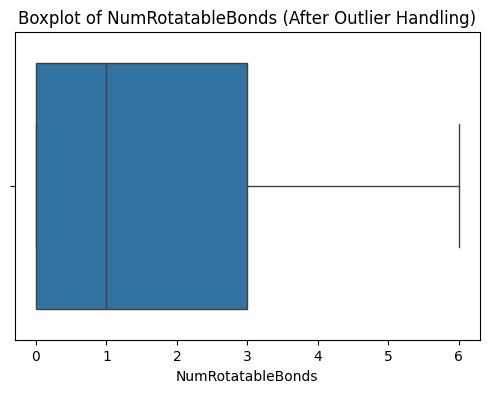

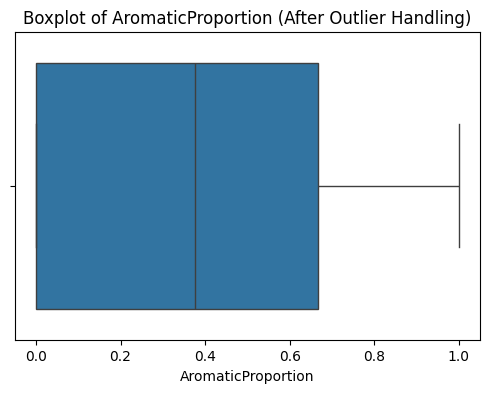

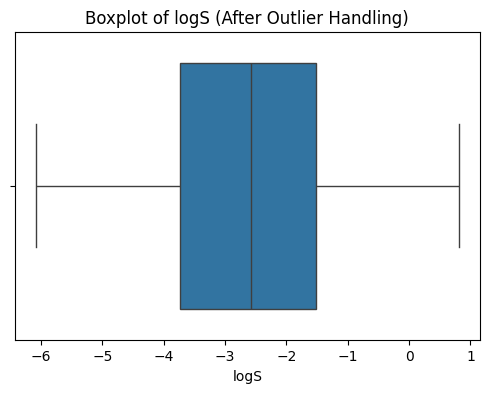

In [ ]:
# Re-visualize boxplots after outlier handling
print("Boxplots After Outlier Handling:")
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column} (After Outlier Handling)')
    plt.show()

# **Data preparation**

## Seperate Features (X) and Target (Y)

In [ ]:
# 3. Feature and Target Separation
X = df.drop("logS", axis=1)  # Features
y = df["logS"]  # Target

## Standardize features

In [ ]:
# 4. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Data Splitting (Training (80%) , Testing (20%) )




In [ ]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

# **Model Building**

## Random Forest Regressor Model

In [ ]:
# 6. Random Forest Regressor Model
rf = RandomForestRegressor(n_estimators=100, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=100)

## Prediction

In [ ]:
# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# **Model Evaluation**

## Training Metrics

In [ ]:
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

## testing Metrics

In [ ]:
# Testing metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

## Output of Training and testing metrics

In [ ]:
print(f"Random Forest Regressor Metrics:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test R²: {test_r2:.4f}")

Random Forest Regressor Metrics:
Train MSE: 0.0731
Train R²: 0.9696
Test MSE: 0.3307
Test R²: 0.8300


# **Cross-Validation**

In [ ]:
# 8. Cross-Validation
cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring="neg_mean_squared_error")
cv_mse = -cv_scores.mean()
print(f"Cross-Validated MSE for Random Forest: {cv_mse:.4f}")

Cross-Validated MSE for Random Forest: 0.4783


## Residual Plot

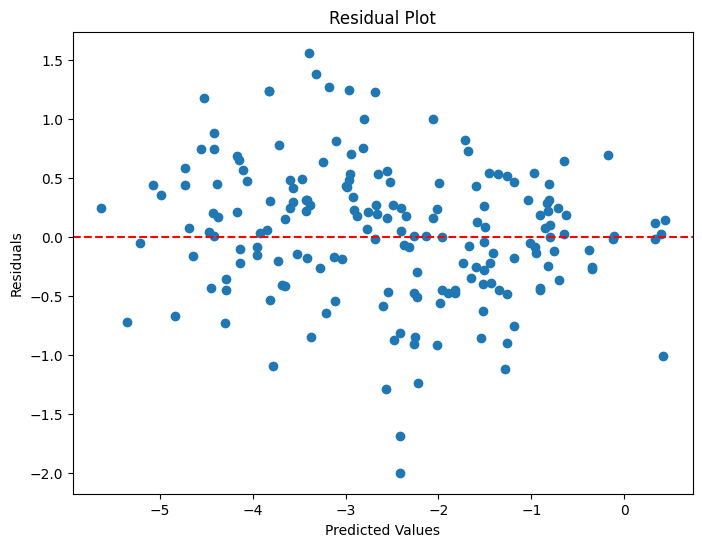

In [ ]:
# 9. Residual Plot
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

## Actual Vs Predicted values for Training Data

In [ ]:
#y_train_pred = rf.predict(X_train)
#y_test_pred = rf.predict(X_test)
# Actual vs Predicted for Training Data
train_comparison = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
print("\nTraining Data Comparison (Actual vs Predicted):")
print(train_comparison.head())


Training Data Comparison (Actual vs Predicted):
      Actual  Predicted
322    -1.14  -1.031105
618    -1.62  -1.514463
318    -1.11  -1.076187
1118   -2.68  -2.913440
267     0.36   0.327471


## Actual Vs Predicted values for Testing Data

In [ ]:
# Actual vs Predicted for Testing Data
test_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\nTesting Data Comparison (Actual vs Predicted):")
print(test_comparison.head())


Testing Data Comparison (Actual vs Predicted):
     Actual  Predicted
536   -0.60  -0.823912
994   -2.05  -2.808550
873   -1.80  -1.352548
25    -2.74  -2.235645
610   -2.58  -2.917693


# **Actual Vs Predicted Visualization**


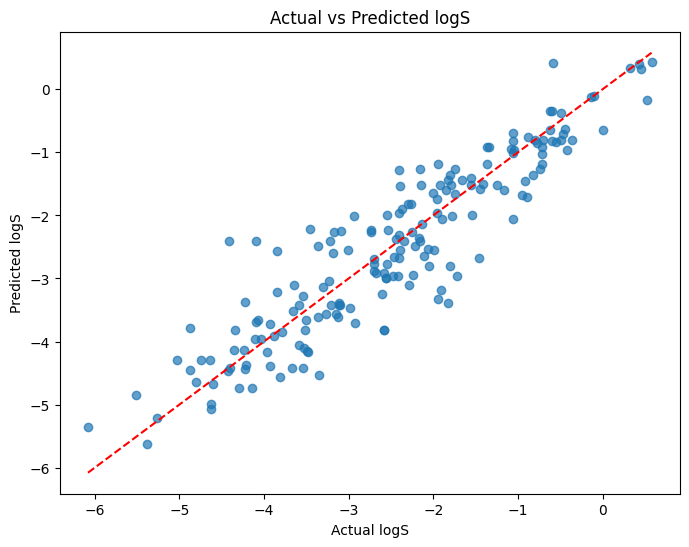

In [ ]:
# 10. Additional visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual logS")
plt.ylabel("Predicted logS")
plt.title("Actual vs Predicted logS")
plt.show()